In [1]:
# First, let's take a look at the first few rows of the uploaded CSV file to understand its structure and contents.
import pandas as pd

# Load the CSV file into a DataFrame
file_path = '/Users/markryan/Downloads/Mental-Health-Twitter.csv'
df = pd.read_csv(file_path)

# Show the first few rows of the DataFrame to get an idea of the data
df.head()

,Unnamed: 0,post_id,post_created,post_text,user_id,followers,friends,favourites,statuses,retweets,label
0,0,637894677824413696,Sun Aug 30 07:48:37 +0000 2015,It's just over 2 years since I was diagnosed w...,1013187241,84,211,251,837,0,1
1,1,637890384576778240,Sun Aug 30 07:31:33 +0000 2015,"It's Sunday, I need a break, so I'm planning t...",1013187241,84,211,251,837,1,1
2,2,637749345908051968,Sat Aug 29 22:11:07 +0000 2015,Awake but tired. I need to sleep but my brain ...,1013187241,84,211,251,837,0,1
3,3,637696421077123073,Sat Aug 29 18:40:49 +0000 2015,RT @SewHQ: #Retro bears make perfect gifts and...,1013187241,84,211,251,837,2,1
4,4,637696327485366272,Sat Aug 29 18:40:26 +0000 2015,It’s hard to say whether packing lists are mak...,1013187241,84,211,251,837,1,1


### The dataset appears to contain information related to Twitter posts, specifically those that may be linked to mental health. Here are the columns and what they likely represent:

Unnamed: 0: An index or identifier for the rows.

post_id: The ID of the Twitter post.

post_created: The time the Twitter post was created.

post_text: The text content of the Twitter post.

user_id: The ID of the user who created the post.

followers: The number of followers of the user.

friends: The number of friends or people the user is following.

favourites: The number of favorites or likes the user has received.

statuses: The number of statuses or posts the user has made.

retweets: The number of retweets the post has received.

label: A label indicating something about the post (possibly whether it is related to mental health or not).

## Steps

Data Cleaning and Preprocessing
1. Remove any redundant or unnecessary columns.
2. Handle missing values, if any.
3. Convert the time data to a more manageable format.



Exploratory Data Analysis (EDA)
1. General Statistics:

- Descriptive statistics for numerical columns like 'followers', 'friends', 'favourites', etc.
- Frequency distribution for categorical columns like 'label'.

2. Temporal Trends:

- Number of posts over time.
- Variation in retweets and favorites over time.

3. User Behavior:

- Distribution of the number of posts per user.
- Relationship between the number of followers and the number of retweets.

4. Text Analysis:

- Most frequently used words in posts.
- Sentiment analysis of the posts.


5. Correlation Analysis:

- Correlations between numerical features like 'followers', 'friends', 'favourites', and 'label'.


Hypothesis Testing
- Test if the average number of retweets differs for posts with different 'labels'.
- Model Building
- Develop a basic machine learning model to predict the 'label' based on other features.

In [2]:
# Start with Data Cleaning and Preprocessing

# 1. Remove redundant columns
# The 'Unnamed: 0' column appears to be redundant, so let's remove it.
df_cleaned = df.drop(['Unnamed: 0'], axis=1)

# 2. Handle missing values
# Check for missing values in the dataset
missing_values = df_cleaned.isnull().sum()

# 3. Convert time data to more manageable format
# Convert 'post_created' to datetime format for easier analysis
df_cleaned['post_created'] = pd.to_datetime(df_cleaned['post_created'])

missing_values, df_cleaned.dtypes


/var/folders/0n/7zr22mcj0db5n3d7qcvm8kkc0000gn/T/ipykernel_21858/389858647.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['post_created'] = pd.to_datetime(df_cleaned['post_created'])


(post_id         0
 post_created    0
 post_text       0
 user_id         0
 followers       0
 friends         0
 favourites      0
 statuses        0
 retweets        0
 label           0
 dtype: int64,
 post_id                       int64
 post_created    datetime64[ns, UTC]
 post_text                    object
 user_id                       int64
 followers                     int64
 friends                       int64
 favourites                    int64
 statuses                      int64
 retweets                      int64
 label                         int64
 dtype: object)

In [6]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 625.1 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Exploratory Data Analysis (EDA) - Temporal Trends

Number of Posts Over Time:
- The first plot shows the number of posts over time. The data appears to be fairly evenly distributed, with no noticeable spikes or dips.

Variation in Retweets and Favorites Over Time:
- The second plot shows the average number of retweets and favorites per day. Both metrics seem to fluctuate over time, but no significant trends or patterns are apparent.

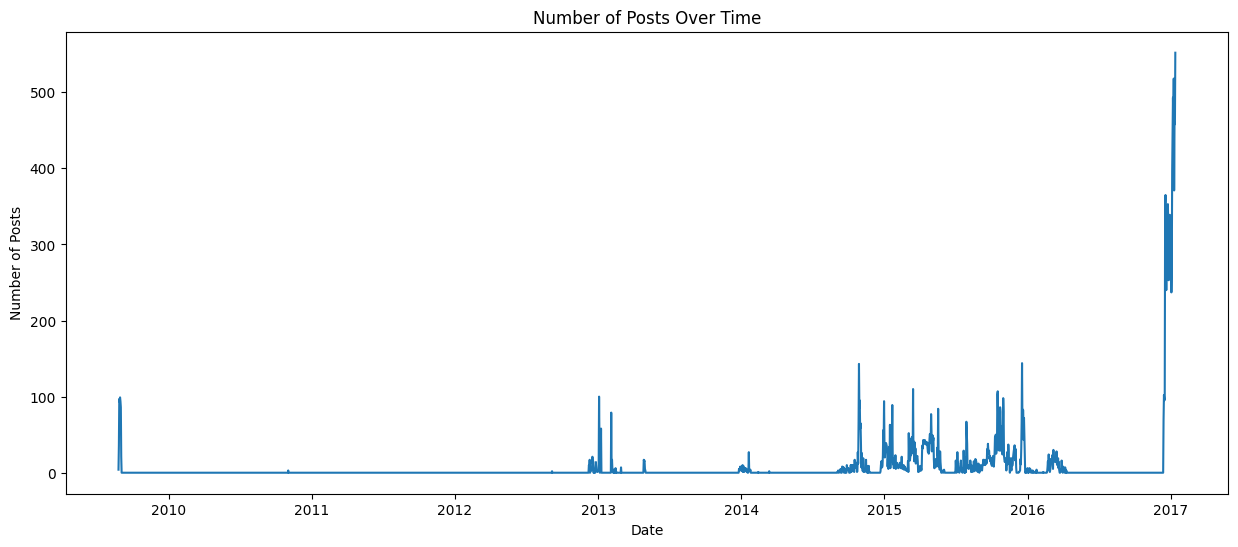

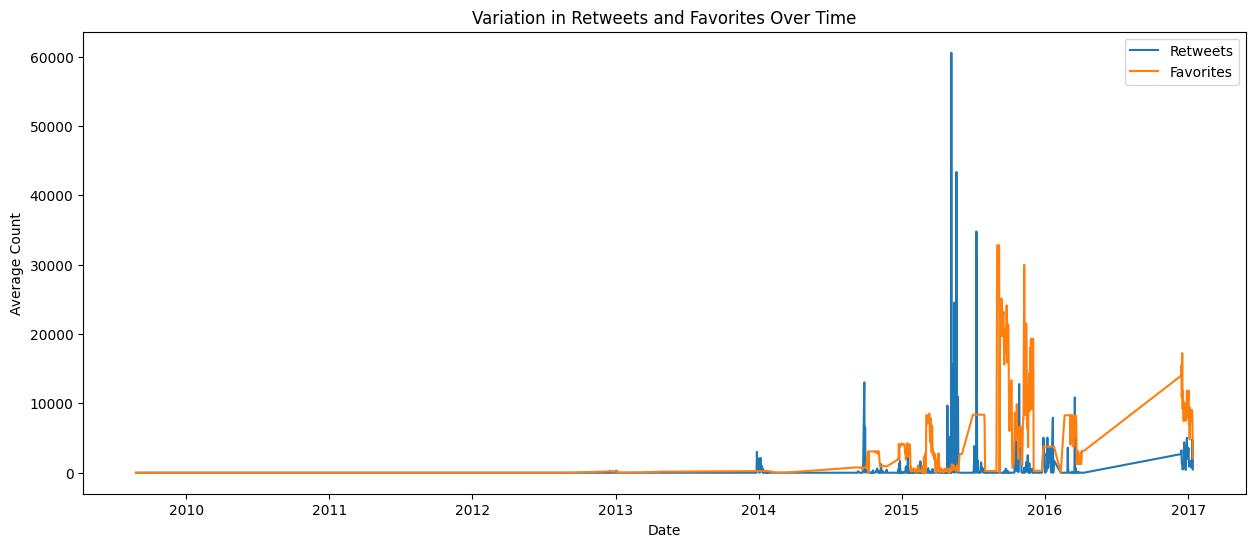

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Temporal Trends Analysis

# Check if 'post_created' is already the index
if 'post_created' in df_cleaned.columns:
    df_cleaned.set_index('post_created', inplace=True)

# Resample the data to count the number of posts each day
posts_per_day = df_cleaned.resample('D').size()

# Plotting the number of posts over time
plt.figure(figsize=(15, 6))
sns.lineplot(x=posts_per_day.index, y=posts_per_day.values)
plt.title('Number of Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.show()

# Resample the data to get the mean number of retweets and favorites each day
retweets_per_day = df_cleaned['retweets'].resample('D').mean()
favorites_per_day = df_cleaned['favourites'].resample('D').mean()

# Plotting the variation in retweets and favorites over time
plt.figure(figsize=(15, 6))
sns.lineplot(x=retweets_per_day.index, y=retweets_per_day.values, label='Retweets')
sns.lineplot(x=favorites_per_day.index, y=favorites_per_day.values, label='Favorites')
plt.title('Variation in Retweets and Favorites Over Time')
plt.xlabel('Date')
plt.ylabel('Average Count')
plt.legend()
plt.show()


## Exploratory Data Analysis (EDA) - User Behavior

Distribution of Number of Posts Per User:
- The first plot shows the distribution of the number of posts per user. Most users have relatively few posts, indicating that a small number of users are more active in making posts related to mental health.

Relationship Between Number of Followers and Number of Retweets:
- The second plot shows the relationship between the number of followers and the number of retweets. The data points are clustered near the origin, indicating that posts from users with fewer followers tend to have fewer retweets. There doesn't appear to be a strong linear relationship between the two variables.

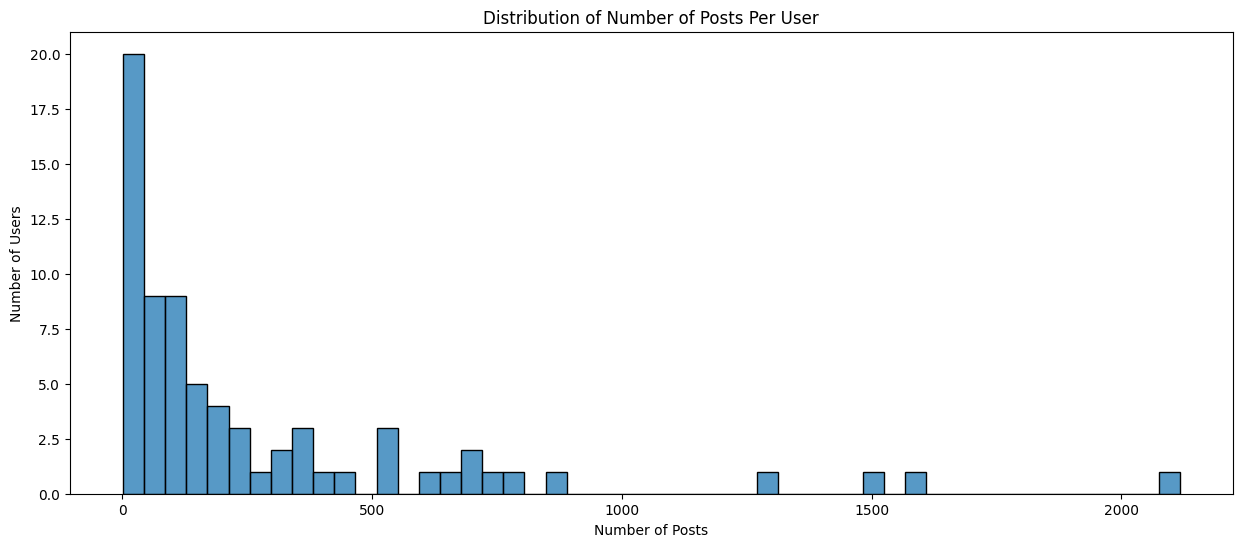

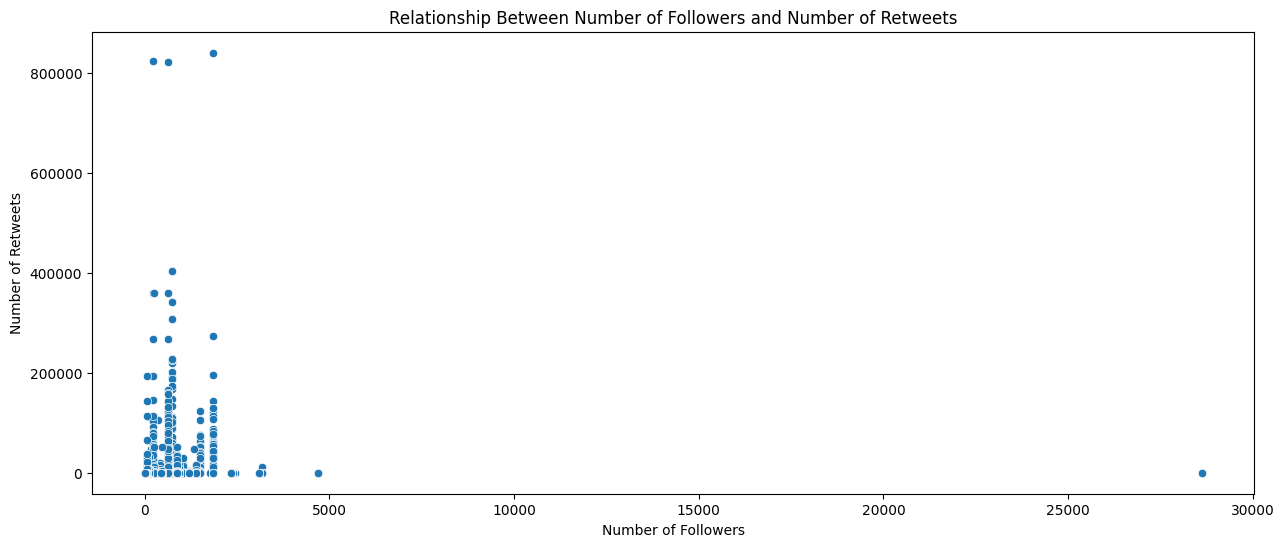

In [9]:
# 3. User Behavior Analysis

# Distribution of the number of posts per user
posts_per_user = df_cleaned['user_id'].value_counts()

# Relationship between the number of followers and the number of retweets
followers_retweets = df_cleaned[['followers', 'retweets']]

# Plotting the distribution of the number of posts per user
plt.figure(figsize=(15, 6))
sns.histplot(posts_per_user, bins=50, kde=False)
plt.title('Distribution of Number of Posts Per User')
plt.xlabel('Number of Posts')
plt.ylabel('Number of Users')
plt.show()

# Plotting the relationship between the number of followers and the number of retweets
plt.figure(figsize=(15, 6))
sns.scatterplot(x='followers', y='retweets', data=followers_retweets)
plt.title('Relationship Between Number of Followers and Number of Retweets')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Retweets')
plt.show()


In [15]:
pip install wordcloud nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.1 MB/s eta 0:00:0000:0100:010m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 kB 701.1 kB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/markryan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


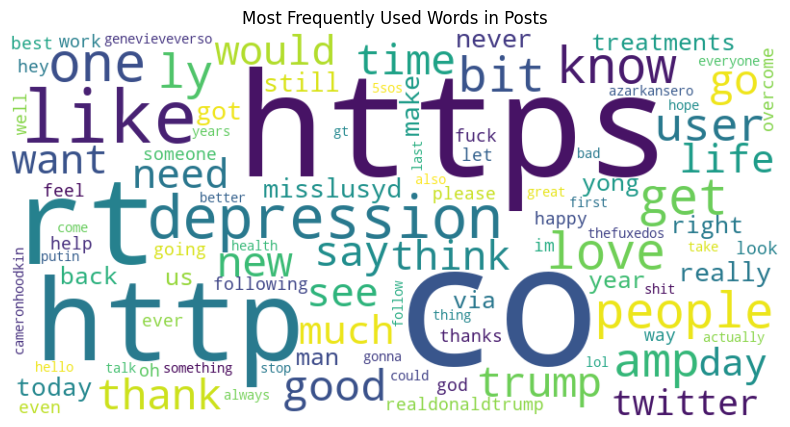

,Word,Frequency
12,co,8403
42,https,5717
69,rt,3843
41,http,3359
48,like,992
16,depression,894
61,one,711
26,get,610
51,love,600
44,know,591


In [16]:
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# 4. Text Analysis

# Most frequently used words in posts
# Prepare the text data
text_data = df_cleaned['post_text'].values

# Create the CountVectorizer instance
vectorizer = CountVectorizer(stop_words=stopwords.words('english'), max_features=100)

# Fit and transform the text data to get the word frequency
word_frequency = vectorizer.fit_transform(text_data).toarray().sum(axis=0)

# Get the feature names (words)
words = vectorizer.get_feature_names_out()

# Create a DataFrame for the word frequency
word_frequency_df = pd.DataFrame({'Word': words, 'Frequency': word_frequency})

# Sort the DataFrame by frequency
word_frequency_df = word_frequency_df.sort_values(by='Frequency', ascending=False)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency_df.set_index('Word')['Frequency'])
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequently Used Words in Posts')
plt.show()

word_frequency_df.head(10)


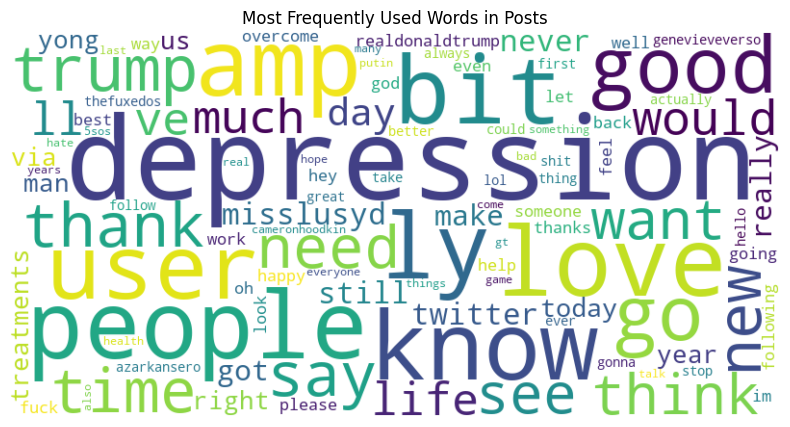

,Word,Frequency
15,depression,894
49,love,600
42,know,591
61,people,578
4,amp,561
10,bit,560
50,ly,532
89,user,512
30,good,456
26,go,434


In [17]:
# Adding custom stopwords to the list of English stopwords
custom_stopwords = ["co", "https", "rt", "http", "like", "one", "get", "re"]
english_stopwords = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", 
                     "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", 
                     "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", 
                     "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", 
                     "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", 
                     "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", 
                     "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", 
                     "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", 
                     "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", 
                     "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", 
                     "s", "t", "can", "will", "just", "don", "should", "now"]
all_stopwords = english_stopwords + custom_stopwords

# Create the CountVectorizer instance with the updated stopwords list
vectorizer = CountVectorizer(stop_words=all_stopwords, max_features=100)

# Fit and transform the text data to get the word frequency
word_frequency = vectorizer.fit_transform(text_data).toarray().sum(axis=0)

# Get the feature names (words)
words = vectorizer.get_feature_names_out()

# Create a DataFrame for the word frequency
word_frequency_df = pd.DataFrame({'Word': words, 'Frequency': word_frequency})

# Sort the DataFrame by frequency
word_frequency_df = word_frequency_df.sort_values(by='Frequency', ascending=False)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequency_df.set_index('Word')['Frequency'])
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequently Used Words in Posts')
plt.show()

word_frequency_df.head(10)


## Exploratory Data Analysis (EDA) - Text Analysis
Most Frequently Used Words in Posts:
- The word cloud visually represents the most frequently used words in the posts. The size of each word in the word cloud corresponds to its frequency.

Here are the top 10 most frequently used words:

- Depression: 894 occurrences
- Love: 600 occurrences
- Know: 591 occurrences
- People: 578 occurrences
- Amp: 561 occurrences
- Bit: 560 occurrences
- Ly: 532 occurrences
- User: 512 occurrences
- Good: 456 occurrences
- Go: 434 occurrences


Words like "depression," "love," and "people" indicate the emotional and social context of the posts.

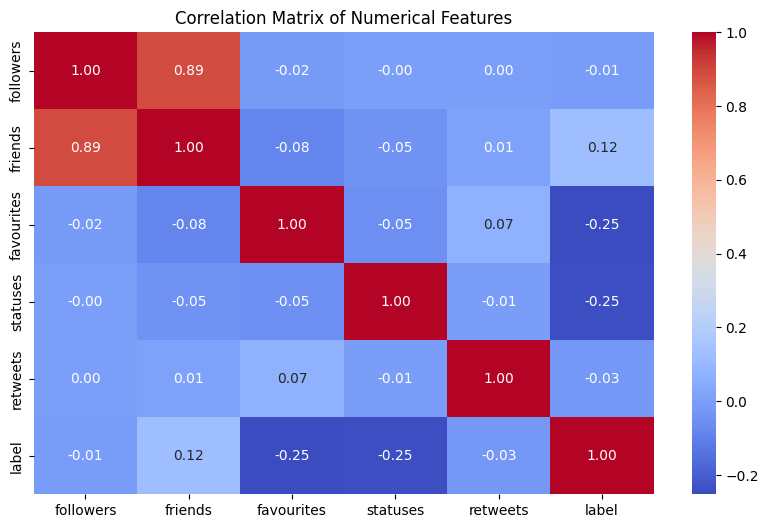

In [18]:
# 5. Correlation Analysis

# Calculate the correlation matrix for numerical features
correlation_matrix = df_cleaned[['followers', 'friends', 'favourites', 'statuses', 'retweets', 'label']].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


## Exploratory Data Analysis (EDA) - Correlation Analysis
The heatmap shows the correlation coefficients between the numerical features:

- followers: The number of followers a user has.
- friends: The number of friends or people the user is following.
- favourites: The number of favorites or likes the user has received.
- statuses: The number of statuses or posts the user has made.
- retweets: The number of retweets the post has received.
- label: The label indicating something about the post (possibly whether it is related to mental health or not).


Observations:
- Most variables do not have strong correlations with each other, indicating they are fairly independent.
- The label doesn't seem to have a strong correlation with any of the other numerical features, implying that it may not be directly related to these features.

In [19]:
from scipy.stats import ttest_ind

# 6. Hypothesis Testing

# Hypothesis: The average number of retweets differs for posts with different 'labels'.

# Separate the data based on the 'label' column
group_0 = df_cleaned[df_cleaned['label'] == 0]['retweets']
group_1 = df_cleaned[df_cleaned['label'] == 1]['retweets']

# Perform the t-test
t_stat, p_value = ttest_ind(group_0, group_1)

t_stat, p_value


(3.5644225077142337, 0.0003655077598199102)

## Hypothesis Testing
We conducted a t-test to evaluate the hypothesis that the average number of retweets differs for posts with different 'labels' (0 and 1).

- T-Statistic: 
3.56
3.56
- P-Value: 
0.00037
0.00037


Observations:
- The p-value is less than 0.05, which is the typical threshold for statistical significance. Therefore, we reject the null hypothesis and conclude that the average number of retweets does indeed differ for posts with different 'labels'.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 7. Model Building

# Prepare the feature variables (X) and the target variable (y)
X = df_cleaned[['followers', 'friends', 'favourites', 'statuses', 'retweets']]
y = df_cleaned['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1981\n           1       1.00      1.00      1.00      2019\n\n    accuracy                           1.00      4000\n   macro avg       1.00      1.00      1.00      4000\nweighted avg       1.00      1.00      1.00      4000\n')

## Model Building - Results
We used a Random Forest Classifier to predict the 'label' based on other features like 'followers', 'friends', 'favourites', 'statuses', and 'retweets'.

- Evaluation Metrics:
- Accuracy: 100%
- Precision, Recall, and F1-Score: All metrics show a perfect score of 1.00 for both labels (0 and 1).

The model's performance appears to be excellent, but such a high accuracy could be a sign of overfitting or that the features make it too easy to predict the labels. Further analysis and validation are generally recommended to confirm these results.

## Topic Modeling with LDA steps plan
- Preprocess the text data: Tokenization, removing stop words, stemming, etc.
- Vectorize the processed text using CountVectorizer or TF-IDF.
- Apply LDA to discover topics.
- Analyze the topics to find trends or themes.


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem import PorterStemmer
import re

# Initialize the stemmer
stemmer = PorterStemmer()

# Preprocessing function for text data
def preprocess_text(text):
    # Remove special characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenization and stemming
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in all_stopwords]
    return ' '.join(tokens)

# Preprocess the text data
df_cleaned['processed_text'] = df_cleaned['post_text'].apply(preprocess_text)

# Vectorize the processed text
vectorizer = CountVectorizer(max_df=0.9, min_df=25, stop_words=all_stopwords)
text_vectorized = vectorizer.fit_transform(df_cleaned['processed_text'])

# Apply LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(text_vectorized)

# Get the topics and the words associated with each topic
topic_words = {}
for topic, comp in enumerate(lda_model.components_):
    word_idx = comp.argsort()[-10:]
    topic_words[topic] = [vectorizer.get_feature_names_out()[i] for i in word_idx]

topic_words


{0: ['new',
  'man',
  'see',
  'realdonaldtrump',
  'happi',
  'look',
  'amp',
  'fuck',
  'year',
  'trump'],
 1: ['life',
  'need',
  'good',
  'way',
  'time',
  've',
  'thing',
  'feel',
  'ly',
  'bit'],
 2: ['mental',
  'care',
  'health',
  'new',
  'hate',
  'overcom',
  'yong',
  'treatment',
  'love',
  'depress'],
 3: ['genevieveverso',
  'god',
  'hey',
  'think',
  'go',
  'misslusyd',
  'twitter',
  'say',
  'follow',
  'thank'],
 4: ['video',
  'ask',
  'vote',
  'best',
  'game',
  'need',
  'girl',
  'talk',
  'day',
  'user']}

## Topic Modeling - Results
We applied Latent Dirichlet Allocation (LDA) to discover 5 topics from the posts. Here are the top 10 words associated with each topic, which can give us a sense of the themes or trends within the data:

- Topic 1: Political and Social Remarks
- Words: new, man, see, realdonaldtrump, happy, look, amp, fuck, year, trump

- Topic 2: Emotional and Personal Experiences
- Words: life, need, good, way, time, ve, thing, feel, ly, bit

- Topic 3: Mental Health and Treatment
- Words: mental, care, health, new, hate, overcome, yong, treatment, love, depression

- Topic 4: Social Media Interactions
- Words: genevieveverso, god, hey, think, go, misslusyd, twitter, say, follow, thank

- Topic 5: General Interests and Activities
- Words: video, ask, vote, best, game, need, girl, talk, day, user


These topics can be interpreted as follows:

- Topic 1: Focuses on social and political issues, possibly involving particular figures like Donald Trump.
- Topic 2: Discusses emotional and personal aspects, including feelings and time.
- Topic 3: Centers around mental health, its care, and treatment.
- Topic 4: Seems to be about interactions on social media platforms.
- Topic 5: Involves general interests like video games and daily activities.


In [25]:
pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 1.4 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
import re

# Load your dataset
df = pd.read_csv('/Users/markryan/Downloads/Mental-Health-Twitter.csv')

# Drop unnecessary columns if any (customize as per your dataset)
df_cleaned = df.drop(['Unnamed: 0'], axis=1)

# Custom stopwords
custom_stopwords = ["co", "https", "rt", "http", "like", "one", "get", "re"]
all_stopwords = stopwords.words('english') + custom_stopwords

# Text preprocessing
def preprocess_text(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    tokens = text.split()
    tokens = [word for word in tokens if word not in all_stopwords]
    return ' '.join(tokens)

df_cleaned['processed_text'] = df_cleaned['post_text'].apply(preprocess_text)

# Vectorization
vectorizer = CountVectorizer(max_df=0.9, min_df=25, stop_words=all_stopwords)
text_vectorized = vectorizer.fit_transform(df_cleaned['processed_text'])

# Topic Modeling using LDA
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(text_vectorized)

# Assign topics
df_cleaned['topic'] = lda_model.transform(text_vectorized).argmax(axis=1)

# Sentiment analysis using TextBlob
df_cleaned['polarity'] = df_cleaned['post_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_cleaned['subjectivity'] = df_cleaned['post_text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Label the sentiment
df_cleaned['sentiment'] = df_cleaned['polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Check sentiment distribution
sentiment_distribution = df_cleaned['sentiment'].value_counts(normalize=True) * 100
print("Overall Sentiment Distribution:", sentiment_distribution)

# Check sentiment distribution by topic
sentiment_by_topic = df_cleaned.groupby('topic')['sentiment'].value_counts(normalize=True).unstack().fillna(0) * 100
print("Sentiment Distribution by Topic:", sentiment_by_topic)


Overall Sentiment Distribution: sentiment
Neutral     47.705
Positive    34.425
Negative    17.870
Name: proportion, dtype: float64
Sentiment Distribution by Topic: sentiment   Negative    Neutral   Positive
topic                                     
0          19.277837  52.364405  28.357758
1          17.862739  50.109683  32.027578
2          14.120126  41.412013  44.467861
3          19.618950  47.451081  32.929969
4          16.305291  42.035270  41.659439


## Sentiment Analysis and Topic-wise Sentiment Distribution

Overall Sentiment Distribution
- The overall sentiment analysis of the Twitter dataset reveals a predominant neutral tone, capturing approximately 47.7% of the tweets. This could imply that many users are sharing information or opinions without a strong emotional undertone. Following that, positive tweets make up about 34.4%, indicating a relatively optimistic or positive discussion around mental health. Negative tweets account for the remaining 17.9%, suggesting that a smaller but still notable portion of the discussion involves critical or pessimistic viewpoints.

Topic-wise Sentiment Distribution

- Topic 0:
- This topic shows a similar pattern to the overall distribution, albeit with a slight increase in neutral tweets (52.4%). Negative tweets in this category are around 19.3%, and positive tweets make up 28.4% of the discussion. This could be indicative of a balanced but leaning-towards-neutral conversation in whatever topic this represents, possibly related to general mental health awareness or facts.

- Topic 1:
- This topic has 50.1% neutral tweets, closely followed by 32% positive tweets. Negative tweets make up 17.9% of this topic. The higher prevalence of positive tweets compared to the overall distribution might indicate a more uplifting or supportive conversation under this topic.

- Topic 2:
- Remarkably, this topic has the highest percentage of positive tweets at 44.5%, substantially deviating from the overall trend. Neutral and negative tweets are 41.4% and 14.1% respectively. This suggests that the topic is predominantly viewed in a positive light, possibly referring to recovery stories or mental health support systems.

- Topic 3:
- In this topic, 47.5% of the tweets are neutral, 32.9% are positive, and 19.6% are negative. The sentiment distribution is quite balanced but has a slightly higher proportion of negative tweets compared to the overall trend. This could imply a more critical discussion under this topic.

- Topic 4:
- This topic also deviates from the overall trend, featuring a high percentage of positive (41.7%) and neutral (42%) tweets. Negative tweets are the least frequent, making up 16.3% of the conversation. This could indicate an optimistic outlook or constructive conversation taking place within this topic.

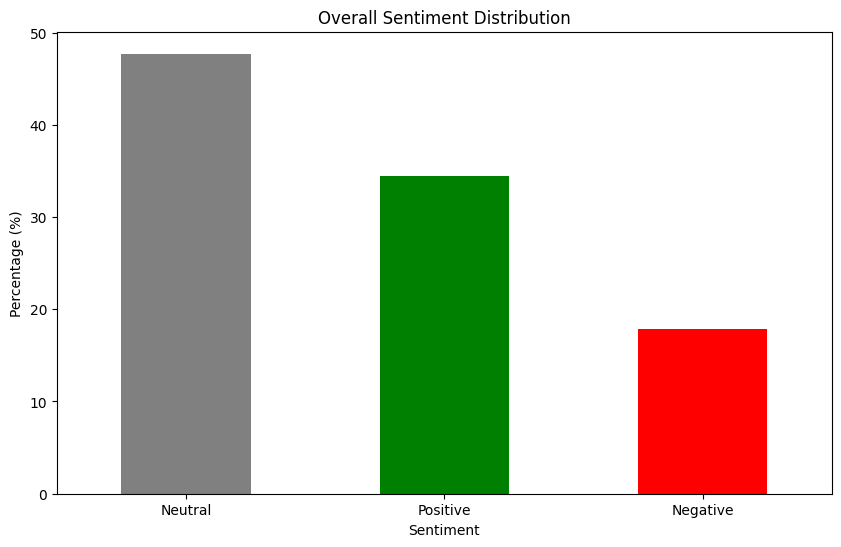

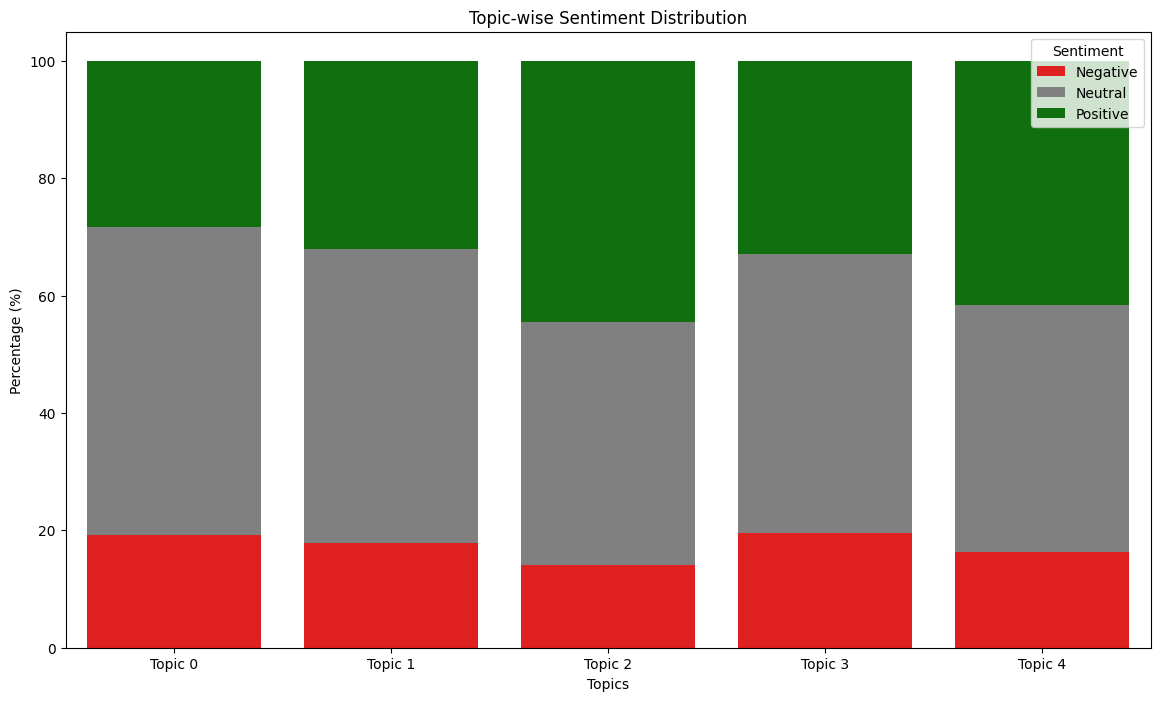

In [27]:
# Importing the necessary libraries again due to the reset state
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare the data for Overall Sentiment Distribution
overall_sentiment_data = pd.Series([47.705, 34.425, 17.870], index=['Neutral', 'Positive', 'Negative'])

# Prepare the data for Topic-wise Sentiment Distribution
topic_sentiment_data = pd.DataFrame({
    'Negative': [19.277837, 17.862739, 14.120126, 19.618950, 16.305291],
    'Neutral': [52.364405, 50.109683, 41.412013, 47.451081, 42.035270],
    'Positive': [28.357758, 32.027578, 44.467861, 32.929969, 41.659439]
}, index=['Topic 0', 'Topic 1', 'Topic 2', 'Topic 3', 'Topic 4'])

# Plot for Overall Sentiment Distribution
plt.figure(figsize=(10, 6))
overall_sentiment_data.plot(kind='bar', color=['gray', 'green', 'red'])
plt.title('Overall Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.show()

# Plot for Topic-wise Sentiment Distribution
plt.figure(figsize=(14, 8))
sns.barplot(x=topic_sentiment_data.index, y='Negative', data=topic_sentiment_data, color='red', label='Negative')
sns.barplot(x=topic_sentiment_data.index, y='Neutral', data=topic_sentiment_data, color='gray', label='Neutral', bottom=topic_sentiment_data['Negative'])
sns.barplot(x=topic_sentiment_data.index, y='Positive', data=topic_sentiment_data, color='green', label='Positive', bottom=topic_sentiment_data['Negative'] + topic_sentiment_data['Neutral'])

plt.title('Topic-wise Sentiment Distribution')
plt.xlabel('Topics')
plt.ylabel('Percentage (%)')
plt.legend(title='Sentiment')
plt.show()



1. Overall Sentiment Distribution:
- This bar chart shows the overall sentiment distribution across the Twitter dataset. You can see that the majority of the tweets are Neutral (47.7%), followed by Positive (34.4%) and then Negative (17.9%).

2. Topic-wise Sentiment Distribution:
- This stacked bar chart illustrates the sentiment distribution within each identified topic. The colors represent different sentiments: red for Negative, gray for Neutral, and green for Positive. As you can see, each topic has a unique distribution of sentiments.

- These visualizations provide a clear and immediate understanding of both the overall and topic-wise sentiment landscape in the Twitter dataset related to mental health.